# EDA

## Some basic data exploration

Our dataset has 30,179 rows and 81 columns. The following are details about some of the most important columns:

1. ```neighbourhood```:  which neighborhood the property is in
2. ```longitude```, ```latitude```: longitude and latitude
3. ```property_type```: type of property, such as apartment, condo etc.
4. ```bathrooms```: number of bathrooms
5. ```bedrooms```: number of bedrooms
6. ```price```:  price of the listing
7. ```number_of_reviews```: number of reviews given by customers who stayed there
8. ```parking```: 1 means there is parking available, -1 means there is not

For other categorical variables, such as ```outdoor_friendly```, ```gym```, etc., the 1,-1 should be interpreted similarly to ```parking``` as explained above.


In [3]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import folium  #needed for interactive map
from folium.plugins import HeatMap
%matplotlib inline
sns.set()

In [4]:
listings = pd.read_csv('Data/airbnb_nyc.csv', delimiter=',')
listings.shape

(30179, 81)

In [6]:
pd.options.display.max_columns = 100    #show more than the default number of columns
listings.head(3)

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,street,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,Very close to F and G trains and Express bus i...,-The security and comfort of all our guests is...,2787,39698.0,within an hour,1.0,0.0,6.0,1.0,"Brooklyn , NY, United States",Brooklyn,40.64749,-73.97237,Apartment,Private room,2,1.0,1,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",149,1,35,1,3 weeks ago,1,30,60,90,365,9,2,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,6,0,5,1,0.21,1,-1,-1,-1,-1,-1,1,-1,1,1,1,1,1,-1,-1,1,-1,-1,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,Upon arrival please have a legibile copy of yo...,4632,39777.0,within a day,1.0,0.0,1.0,1.0,"New York, NY, United States",Harlem,40.80902,-73.94190,Apartment,Private room,2,1.0,1,1,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",150,2,20,3,34 months ago,1,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,strict_14_with_grace_period,1,0,1,0,NaN,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,7750,Huge 2 BR Upper East Cental Park,NaN,Large Furnished 2BR one block to Central Park...,none,NaN,NaN,NaN,17985,39953.0,within a day,1.0,0.0,2.0,1.0,"New York, NY, United States",Harlem,40.79685,-73.94872,Apartment,Entire home/apt,4,1.0,2,2,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",190,1,0,7,7 weeks ago,1,4,14,14,249,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,flexible,2,1,1,0,NaN,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1


In [7]:
listings[['price','bedrooms','bathrooms','number_of_reviews']].describe()

,price,bedrooms,bathrooms,number_of_reviews
count,30179.000000,30179.000000,30179.000000,30179.000000
mean,132.949965,1.265516,1.151595,4.459889
std,93.151824,0.614659,0.422225,5.265633
min,0.000000,1.000000,0.500000,0.000000
25%,65.000000,1.000000,1.000000,0.000000
50%,100.000000,1.000000,1.000000,2.000000
75%,175.000000,1.000000,1.000000,7.000000
max,500.000000,11.000000,7.500000,20.000000


In [8]:
listings[['price','bedrooms','bathrooms','number_of_reviews']].describe(percentiles=[0.25,0.50,0.75,0.9,0.95,0.99])

,price,bedrooms,bathrooms,number_of_reviews
count,30179.000000,30179.000000,30179.000000,30179.000000
mean,132.949965,1.265516,1.151595,4.459889
std,93.151824,0.614659,0.422225,5.265633
min,0.000000,1.000000,0.500000,0.000000
25%,65.000000,1.000000,1.000000,0.000000
50%,100.000000,1.000000,1.000000,2.000000
75%,175.000000,1.000000,1.000000,7.000000
90%,250.000000,2.000000,2.000000,13.000000
95%,325.000000,3.000000,2.000000,16.000000
99%,450.000000,4.000000,2.500000,20.000000


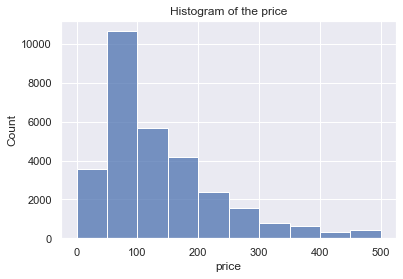

In [17]:
plt.figure()
sns.histplot(listings['price'],bins=10)     # displot  or histplot
plt.title('Histogram of the price')
plt.show()

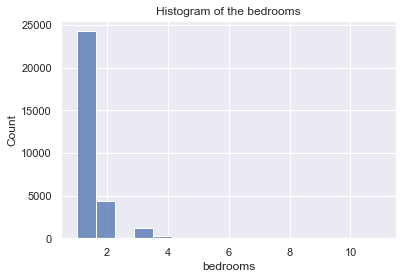

In [18]:
plt.figure()
sns.histplot(listings['bedrooms'])     # displot  or histplot
plt.title('Histogram of the bedrooms')
plt.show()

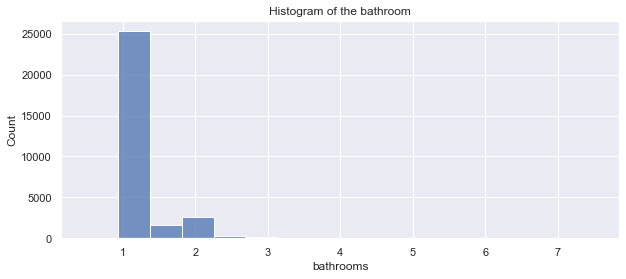

In [15]:
plt.figure(figsize=(10,4))
sns.histplot(listings['bathrooms'])     # displot  or histplot
plt.title('Histogram of the bathroom')
plt.show()

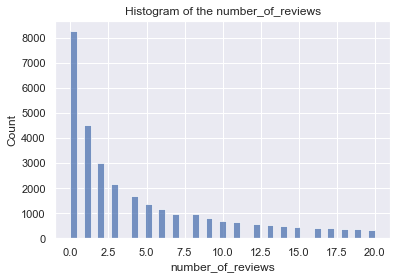

In [19]:
plt.figure()
sns.histplot(listings['number_of_reviews'])     # displot  or histplot
plt.title('Histogram of the number_of_reviews')
plt.show()

Otra forma de realizarlo

(array([ 3571., 10648.,  5690.,  4199.,  2360.,  1573.,   780.,   638.,
          306.,   414.]),
 array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450., 500.]),
 <BarContainer object of 10 artists>)

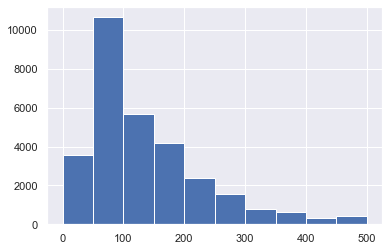

In [20]:
plt.hist(listings['price'])

Realizar todos los histogramas con iteraciones

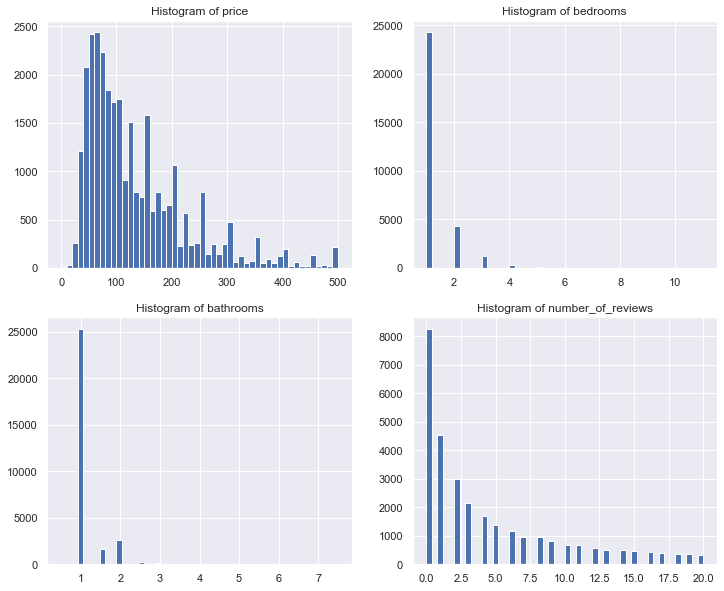

In [34]:
plt.figure(figsize = (12,10))
variables = ['price','bedrooms','bathrooms','number_of_reviews']
for i, var in enumerate(variables,start =1):
    plt.subplot(2,2,i)
    plt.hist(listings[var],50)
    title_string = 'Histogram of ' + var
    plt.title(title_string)
    



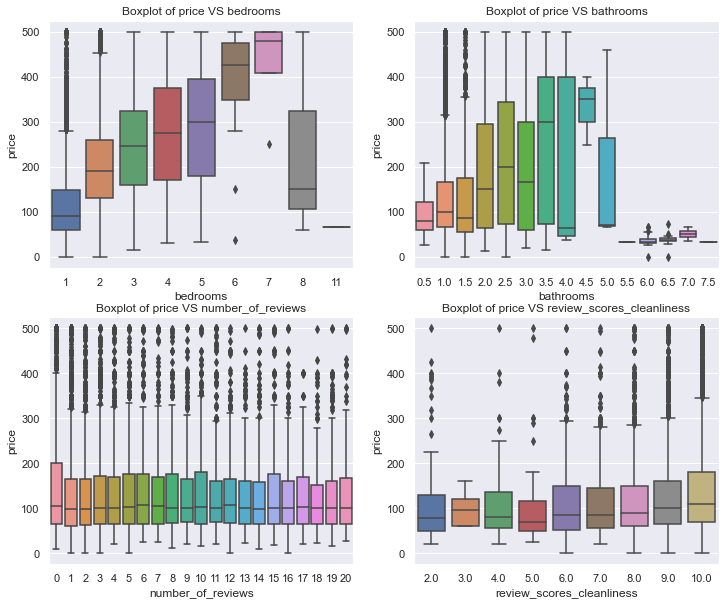

In [38]:
plt.figure(figsize = (12,10))
variables = ['bedrooms','bathrooms','number_of_reviews','review_scores_cleanliness']
for i, var in enumerate(variables,start =1):
    plt.subplot(2,2,i)
    sns.boxplot(x = var , y='price', data = listings)
    title_string = 'Boxplot of price VS ' + var
    plt.title(title_string)


# Correlations
La diagonal principal siempre es 1 y es simetrica en el triangulo superior y en el inferior

In [40]:
listings[['price', 'bedrooms']].corr()

,price,bedrooms
price,1.000000,0.454539
bedrooms,0.454539,1.000000


In [41]:
listings.corr()

,id,host_id,host_since,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
id,1.000000,0.567767,0.530654,0.103325,0.062122,0.071475,-0.351613,-0.005784,0.109353,0.095344,0.041364,0.052900,0.081639,0.027533,0.073860,0.015423,0.000090,NaN,0.275434,0.310207,0.323030,0.241093,-0.099074,0.281097,0.005712,-0.008610,0.051732,-0.026479,-0.046465,0.061172,0.018077,0.370174,0.119937,0.098897,0.111743,0.074851,0.557623,-0.238283,0.053860,0.001858,0.061554,0.073392,0.038773,0.197887,0.087920,0.007983,0.189066,0.179178,0.018486,-0.012869,0.060977,-0.335233,0.093657,0.065741,0.067887,-0.019574,0.004068,0.133459,-0.055286,0.264720,-0.062950,0.143029,0.002802,-0.074635,0.026211
host_id,0.567767,1.000000,0.905404,0.031051,0.002383,0.036721,-0.471233,0.025581,0.128454,0.103469,0.058319,0.055659,0.114607,0.028931,0.093609,0.030244,0.000424,NaN,0.293828,0.333110,0.350964,0.299765,-0.031790,0.191829,-0.082189,-0.089129,-0.001015,-0.084407,-0.105143,-0.016744,-0.063119,0.304739,0.150896,0.125094,0.140272,0.075075,0.431707,-0.149752,0.048199,-0.004128,0.006306,0.015449,0.024602,0.161820,0.024614,0.043710,0.140030,0.106922,-0.043834,-0.013130,0.034135,-0.233112,0.051000,0.008452,0.033211,-0.001314,-0.020248,0.121658,-0.046604,0.164151,-0.051488,0.039264,0.000612,-0.033810,0.014483
host_since,0.530654,0.905404,1.000000,0.029362,-0.005315,0.056799,-0.460919,0.043202,0.133671,0.059946,0.037348,0.021578,0.082001,-0.009671,0.051555,0.000478,-0.003294,NaN,0.239441,0.273200,0.291389,0.242459,-0.052206,0.162810,-0.090009,-0.087586,-0.022991,-0.082780,-0.104489,-0.027066,-0.065790,0.289922,0.144230,0.119375,0.134057,0.077951,0.360644,-0.126710,0.026867,-0.000546,0.003265,0.006753,0.026418,0.137461,0.023077,0.036480,0.115689,0.082969,-0.047184,-0.005512,0.034853,-0.213517,0.033959,0.003663,0.032550,0.008638,-0.024976,0.102444,-0.037173,0.134174,-0.033657,0.027736,0.017108,-0.038432,0.020046
host_response_rate,0.103325,0.031051,0.029362,1.000000,0.133280,0.071515,-0.021462,-0.000586,0.018393,0.067337,0.041781,0.037776,0.046493,0.034280,0.048346,0.012583,-0.002015,NaN,-0.096749,-0.092871,-0.090221,-0.043331,0.101951,0.144492,0.050464,0.047434,0.073322,0.056361,0.064596,0.032622,0.037690,0.130772,0.080812,0.073679,0.041405,0.029622,0.167471,-0.001621,0.036806,0.023568,0.058347,0.047595,0.013415,0.129689,-0.015465,0.019995,0.124320,0.116666,0.024969,-0.015566,0.005100,-0.015891,0.066006,0.065656,0.036693,0.011373,0.074723,0.089964,-0.007350,0.056537,-0.009455,0.112369,-0.043715,0.019444,-0.020509
host_is_superhost,0.062122,0.002383,-0.005315,0.133280,1.000000,-0.021501,-0.000838,-0.017228,0.064378,0.026010,-0.003154,0.022136,0.020835,-0.016325,0.038419,0.065973,0.048219,NaN,0.034459,0.051846,0.062296,0.084598,0.246618,0.278945,0.113434,0.096486,0.118412,0.079193,0.081936,0.047967,0.091963,0.009774,-0.002636,-0.041604,0.199202,-0.016710,0.102082,-0.002945,0.039159,0.012663,0.026205,0.065132,0.017904,0.142496,0.021276,0.027264,0.137013,0.134466,0.007642,-0.051817,-0.027200,-0.003716,0.179669,0.074773,0.091193,-0.01834

In [59]:
listings.corr()['price'][listings.corr()['price']>0].sort_values(ascending=False).to_frame().head(10)

,price
price,1.000000
accommodates,0.571541
bedrooms,0.454539
beds,0.421355
guests_included,0.321970
tv,0.271563
elevator,0.229610
calculated_host_listings_count_entire_homes,0.218890
white_goods,0.214283
gym,0.209892


In [57]:
listings.corr()['price'][listings.corr()['price']<0].sort_values(ascending=True).to_frame()

,price
longitude,-0.294196
calculated_host_listings_count_private_rooms,-0.127504
calculated_host_listings_count_shared_rooms,-0.101389
smoking_allowed,-0.054131
host_greeting,-0.051356
number_of_reviews,-0.029229
host_identity_verified,-0.022861
parking,-0.019383
host_is_superhost,-0.016325
number_of_reviews_ltm,-0.011481


In [60]:
folium_map = folium.Map()
folium_map

In [61]:
ny_coords = [40.738, -73.98] # lat, long
folium_map = folium.Map(location=ny_coords)
folium_map

In [62]:
ny_coords = [40.738, -73.98] # lat, long
folium_map = folium.Map(location=ny_coords, zoom_start=13)
folium_map

In [64]:
ny_coords = [40.738, -73.98] # lat, long
folium_map = folium.Map(location=ny_coords, zoom_start=13, tiles="OpenStreetMap")
folium_map

There are other styles available for the `tiles` argument:

* `Stamen Toner`
* `Stamen Terrain`
* `Stamen Watercolor`
* `CartoDB positron`
* `CartoDB dark_matter`

In [70]:
ny_coords = [40.738, -73.98] # lat, long
folium_map = folium.Map(location=ny_coords, zoom_start=13, tiles="Stamen Terrain")
folium_map

In [71]:
folium_hmap = folium.Map(location=ny_coords, zoom_start=13, tiles="Stamen Terrain")

# ZIP gives me the union of lists or series
Luego podemos pasar ese Zip a una lista

In [75]:
my_zip = zip(listings['latitude'], listings['longitude'], listings['price'])
list_of_my_zip = list(my_zip)
list_of_my_zip[0:15]

[(40.64749, -73.97237, 149),
 (40.80902, -73.9419, 150),
 (40.79685, -73.94872, 190),
 (40.65599, -73.97519, 60),
 (40.86754, -73.92639, 80),
 (40.63702, -73.96327, 150),
 (40.66278, -73.97966, 120),
 (40.65944, -73.96238, 150),
 (40.68554, -73.9409, 115),
 (40.73961, -73.98074, 200),
 (40.72004, -73.99104, 110),
 (40.6734299999999, -73.98338, 225),
 (40.65401, -73.96323, 130),
 (40.72912, -73.98057, 50),
 (40.68634, -73.966, 98)]

In [77]:
hm_layer = HeatMap(list_of_my_zip,
                   # These are parameters that we tweak manually to adjust color
                   # See folium docs for more information
                   min_opacity=0.2,
                   radius=8,
                   blur=6, 
                 )

In [78]:
folium_hmap.add_child(hm_layer)
folium_hmap

In [79]:
lat_log_parking_yes = listings.loc[ listings['parking']==1.0, ["latitude","longitude" ] ]
lat_log_parking_no = listings.loc[ listings['parking']==-1.0, ["latitude","longitude" ] ]
folium_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="OpenStreetMap")
for i in range(1000):
    marker = folium.CircleMarker(location=[lat_log_parking_yes["latitude"].iloc[i],lat_log_parking_yes["longitude"].iloc[i]],radius=5,color="blue",fill=True)
    marker.add_to(folium_map)

for i in range(1000):
    marker = folium.CircleMarker(location=[lat_log_parking_no["latitude"].iloc[i],lat_log_parking_no["longitude"].iloc[i]],radius=5,color="red",fill=True)
    marker.add_to(folium_map)    
    
folium_map

In [80]:
cbn = listings.groupby("neighbourhood")[["price", "parking"]].corr()
cbn

price   parking
neighbourhood                            
Allerton      price    1.000000  0.188982
              parking  0.188982  1.000000
Alphabet City price    1.000000  0.107394
              parking  0.107394  1.000000
Annadale      price    1.000000  1.000000
...                         ...       ...
Woodhaven     parking  0.143018  1.000000
Woodlawn      price    1.000000  1.000000
              parking  1.000000  1.000000
Woodside      price    1.000000 -0.170445
              parking -0.170445  1.000000

[372 rows x 2 columns]

In [81]:
cbn = cbn.reset_index()
cbn = cbn.drop(columns=["parking"])
cbn.columns = ["neighbourhood", "variable", "r_parking_price"]
cbn = cbn[cbn["variable"]=="parking"]
cbn = cbn.drop(columns=["variable"])
cbn

,neighbourhood,r_parking_price
1,Allerton,0.188982
3,Alphabet City,0.107394
5,Annadale,1.000000
7,Astoria,0.086911
9,Bath Beach,-1.000000
...,...,...
363,Williamsburg,0.075120
365,Windsor Terrace,0.120691
367,Woodhaven,0.143018
369,Woodlawn,1.000000


<AxesSubplot:title={'center':'Histogram of neighborhood-level correlations for price and parking'}, ylabel='Frequency'>

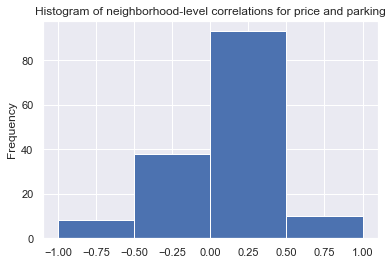

In [82]:
cbn["r_parking_price"].plot.hist(
    bins=[-1, -0.5, 0, 0.5, 1],
    title="Histogram of neighborhood-level correlations for price and parking"
    )

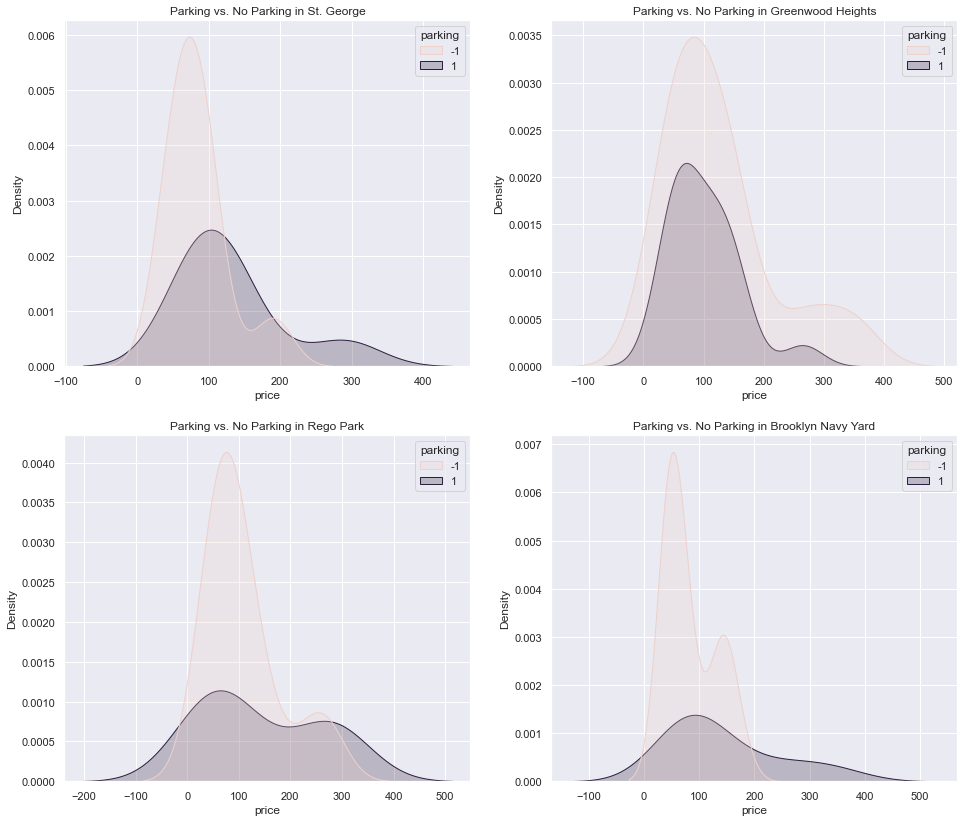

In [94]:
plt.figure(figsize = (16,14))
neigh_to_look = ['St. George','Greenwood Heights','Rego Park','Brooklyn Navy Yard']

for i, neigh in enumerate(neigh_to_look, start=1):
    plt.subplot(2,2,i)
    data_plot = listings[listings['neighbourhood'] == neigh]
    sns.kdeplot(data=data_plot,x='price', hue='parking', shade = True, label="Parking")
    plt.title("Parking vs. No Parking in " + neigh)

# nuevo Dataset

In [96]:
scal = pd.read_csv('Data/scal.csv')
scal.head()

,date,price
0,20190709,149.0
1,20190709,76.0
2,20190710,76.0
3,20190711,76.0
4,20190712,76.0


In [99]:
scal.date = pd.to_datetime(scal['date'],format="%Y%m%d")

In [100]:
scal.head()

,date,price
0,2019-07-09,149.0
1,2019-07-09,76.0
2,2019-07-10,76.0
3,2019-07-11,76.0
4,2019-07-12,76.0


<AxesSubplot:title={'center':'Average price vs. date'}, xlabel='date'>

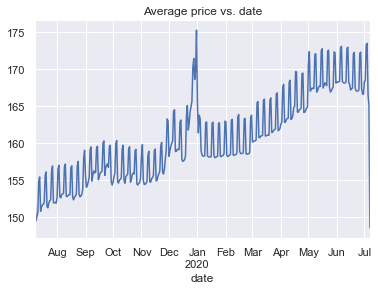

In [108]:
scal = pd.read_csv("data/scal.csv")
scal["date"] = pd.to_datetime(scal["date"], format="%Y%m%d")
scal.groupby("date")["price"].mean().plot(title="Average price vs. date")